In [24]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [25]:
def load_json(json_file_path):
    """JSON 파일을 읽어 파이썬 딕셔너리로 변환"""
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    return data

def map_image_id_to_filename(data):
    """image_id와 file_name을 매핑한 딕셔너리 생성"""
    image_id_to_filename = {}
    for image in data['images']:
        image_id_to_filename[image['id']] = image['file_name']
    return image_id_to_filename

def get_annotations(data, image_id):
    """주어진 image_id에 대한 바운딩 박스 정보 반환"""
    annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]
    return annotations

def draw_bounding_boxes(image_path, annotations):
    """이미지에 바운딩 박스를 그리고 시각화"""
    # 이미지 열기
    image = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    # 각 바운딩 박스 그리기
    for annotation in annotations:
        bbox = annotation['bbox']
        # bbox는 [x, y, width, height] 형식
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

def main(json_file_path, image_folder, target_image_id=None):
    """전체 파이프라인을 실행"""
    # 1. JSON 파일 로드
    data = load_json(json_file_path)
    
    # 2. 이미지 ID와 파일 이름 매핑 생성
    image_id_to_filename = map_image_id_to_filename(data)
    
    # 3. 특정 이미지 ID에 대한 바운딩 박스 정보 확인
    if target_image_id is not None:
        annotations = get_annotations(data, target_image_id)
        if annotations:
            file_name = image_id_to_filename.get(target_image_id, None)
            if file_name:
                image_path = f"{image_folder}/{file_name}"
                draw_bounding_boxes(image_path, annotations)
            else:
                print(f"No image found for image_id {target_image_id}")
        else:
            print(f"No annotations found for image_id {target_image_id}")
    else:
        # 모든 이미지에 대해 바운딩 박스를 확인
        for image_id in image_id_to_filename:
            annotations = get_annotations(data, image_id)
            if annotations:
                file_name = image_id_to_filename.get(image_id, None)
                if file_name:
                    image_path = f"{image_folder}/{file_name}"
                    draw_bounding_boxes(image_path, annotations)
                else:
                    print(f"No image found for image_id {image_id}")

In [26]:
json_path = "/data/ephemeral/home/pseudo/train.json"
image_folder = "/data/ephemeral/home/pseudo/train"

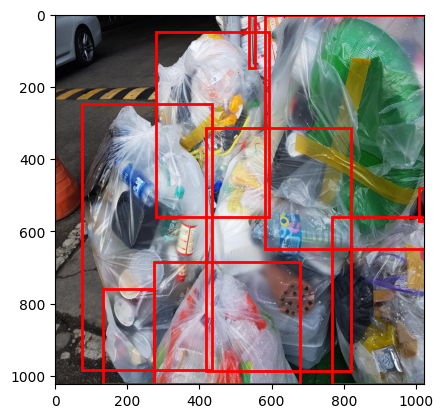

In [41]:
main(json_path,image_folder, 7130)